<a href="https://colab.research.google.com/github/Raimundo2004/An-lise-de-dados-com-a-base-de-dados-do-Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#Carregando a tabela do Titanic
titanic = pd.read_csv('/home/elias/Documentos/VSCode/Ciência_de_ Dados/Projetos/Titanic/Estatísitca/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Tratando os dados**

In [3]:
#Analisando informações dos dados
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Notei que a coluna Age continha valores nulos. Para não perder informações importantes, optei por preenchê-los usando a média de idade calculada para cada grupo de passageiros, considerando o sexo e a classe do navio.

In [5]:
#Consultando a média por classes e sexo
titanic.groupby(["Pclass","Sex"])["Age"].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [6]:
#Preenchendo os dados nulos com base da minha consulta
titanic["Age"] = titanic["Age"].fillna(titanic.groupby(["Pclass","Sex"])["Age"].transform('mean'))

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


Todas as colunas estão preenchisa, mas ainda tem algumas inconsistencias, onde os valores estão como float e então irei converter esses valores.

In [8]:
#Convertendo os dados floats para int
titanic["Age"] = titanic["Age"].astype(int)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


Outra coluna que eu percebi que tem valores nulos e que posso usar eles, é a coluna 'Embarked'

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Procurando os valores nulos da coluna 'Embarked'
titanic[titanic["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


Pesquisei sobre essas duas passageiras e a embarcação delas eram de Southampton

In [12]:
#Tirando os valores nulos
titanic.loc[titanic.Embarked.isnull(),'Embarked']='S'

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Decide criar mais uma coluna para de faixa etária, para facilitar a análise

In [14]:
def faixa_Etaria(idade):
  if idade < 18:
    return ("Child")
  elif idade < 55:
    return ("Adult")
  else:
    return ("Old")

In [15]:
#Testar a função para ver se estar funcionando
faixa_Etaria(6)

'Child'

In [16]:
faixa_Etaria(20)

'Adult'

In [17]:
faixa_Etaria(80)

'Old'

In [18]:
#Com o código funcionando vou adicionar a coluna "Age_group"
titanic["Age_group"] = titanic["Age"].apply(faixa_Etaria)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Adult


In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Adult


In [20]:
#Criando mais uma função para outra coluna totalizando o número de parentes que embarcou junto com a pessoa
def parents_sum(titanic):
  total = titanic['SibSp'] + titanic['Parch']
  if total > 0:
    return(total)
  else:
    return(0)

In [21]:
titanic["Total_parents"] = titanic.apply(parents_sum,axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Total_parents
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,Adult,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Adult,0


# **Analisando os dados**

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
#Analisando o número de quantidade de passageiros por classes
sum_class=titanic.groupby(["Pclass"])["PassengerId"].size()
sum_class

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

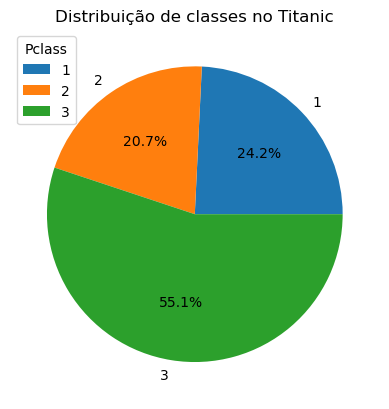

In [24]:
#Criando um gráfico para facilitar a análise
plt.pie(sum_class, labels=sum_class.index, autopct='%1.1f%%')
plt.title("Distribuição de classes no Titanic")
plt.legend(title="Pclass")
plt.show()

In [25]:
#Quantidade de passageiros por embarcação
titanic.groupby(["Embarked"])["PassengerId"].size()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

In [26]:
#Analisando se a classe influênciou no número de mortes no dia do acidente
counts_survide_Pclass = titanic.groupby(["Pclass","Survived"])["Name"].size().unstack()
counts_survide_Pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Essa consulta teve um resultado excelente, onde mostra que a classe influenciou nas mortes dos passageiros. Pois na [arquitetura do navio](https://www.encyclopedia-titanica.org/titanic-deckplans/), indicava quem era da primeira e segunda classe ficavam mais perto dos botes, já a terceira classe não.

Text(0.5, 1.0, 'Quantidade de sobreviventes por classe')

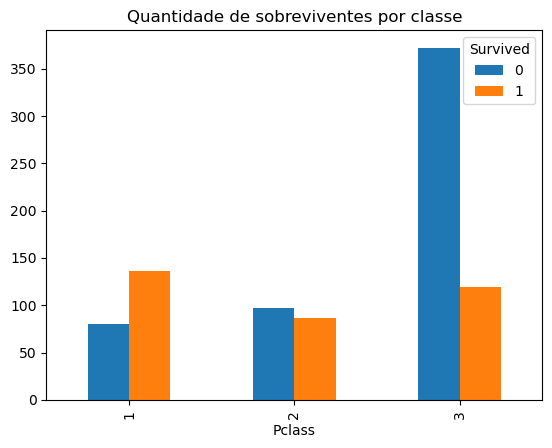

In [27]:
#Gerando gráfico para melhorar a visualização
counts_survide_Pclass.plot(kind='bar')
plt.title("Quantidade de sobreviventes por classe")

In [28]:
titanic.groupby(["Sex","Survived"])["Survived"].size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [29]:
titanic.groupby(["Age_group","Sex","Survived"])["Survived"].size().unstack()

Survived            0    1
Age_group Sex             
Adult     female   63  186
          male    405   82
Child     female   17   38
          male     35   23
Old       female    1    9
          male     28    4

In [30]:
survived_sex = titanic.groupby(["Age_group","Survived"])["Survived"].size().unstack()
survived_sex

Survived,0,1
Age_group,,
Adult,468,268
Child,52,61
Old,29,13


Text(0.5, 1.0, 'Faixa etária de sobreviventes no navio')

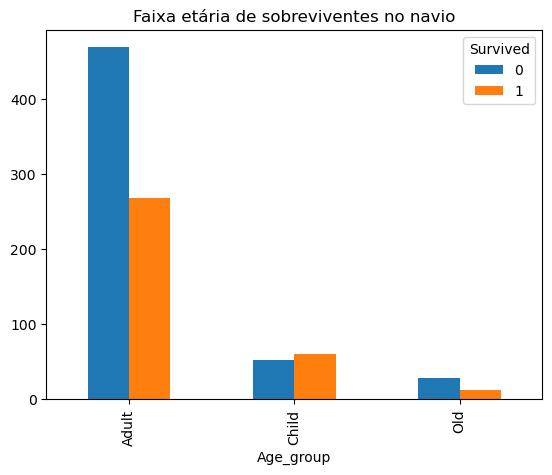

In [31]:
survived_sex.plot(kind='bar')
plt.title("Faixa etária de sobreviventes no navio")

Com essas duas análises deu para perceber que crianças e mulheres sobreviveram mais que os homens, pois eles priorizaram mulheres e crianças primeiro no naufrágio.

In [32]:
titanic[(titanic["Parch"]>=2) & (titanic["Pclass"]==1)].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Total_parents
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S,Adult,5
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S,Adult,5
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,0,2,11752,26.2833,D47,S,Adult,2
297,298,0,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,Child,3
305,306,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,Child,3
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Adult,4
318,319,1,1,"Wick, Miss. Mary Natalie",female,31,0,2,36928,164.8667,C7,S,Adult,2
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.0000,C23 C25 C27,S,Adult,5
377,378,0,1,"Widener, Mr. Harry Elkins",male,27,0,2,113503,211.5000,C82,C,Adult,2
390,391,1,1,"Carter, Mr. William Ernest",male,36,1,2,113760,120.0000,B96 B98,S,Adult,3


In [33]:
titanic.groupby(["Embarked"])["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

In [34]:
titanic.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

In [35]:
titanic[(titanic["SibSp"]>0)&(titanic["Parch"]>0)&(titanic["Pclass"]==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Total_parents
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Child,4
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,Child,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,Adult,6
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,NaN,Q,Child,5
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.0750,NaN,S,Child,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.2750,NaN,S,Child,6
852,853,0,3,"Boulos, Miss. Nourelain",female,9,1,1,2678,15.2458,NaN,C,Child,2
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21,8,2,CA. 2343,69.5500,NaN,S,Adult,10
869,870,1,3,"Johnson, Master. Harold Theodor",male,4,1,1,347742,11.1333,NaN,S,Child,2


In [36]:
box = titanic.groupby(["Pclass","Total_parents"])["Fare"].mean().unstack()
box

Total_parents,0,1,2,3,4,5,6,7,10
Pclass,,,,,,,,,
1,63.672514,91.848039,95.681075,133.521429,262.375000,263.000000,NaN,NaN,NaN
2,14.066106,24.682962,31.693819,36.575969,23.000000,18.750000,NaN,NaN,NaN
3,9.272052,13.410023,16.378277,20.103689,26.972233,32.420588,29.366667,46.9,69.55


Essa análise mostra que a tarifa não só aumenta com relação a classe, mas sim com a quantidade de parentes que foi junto com a pessoa a bordo, junto com a classe.

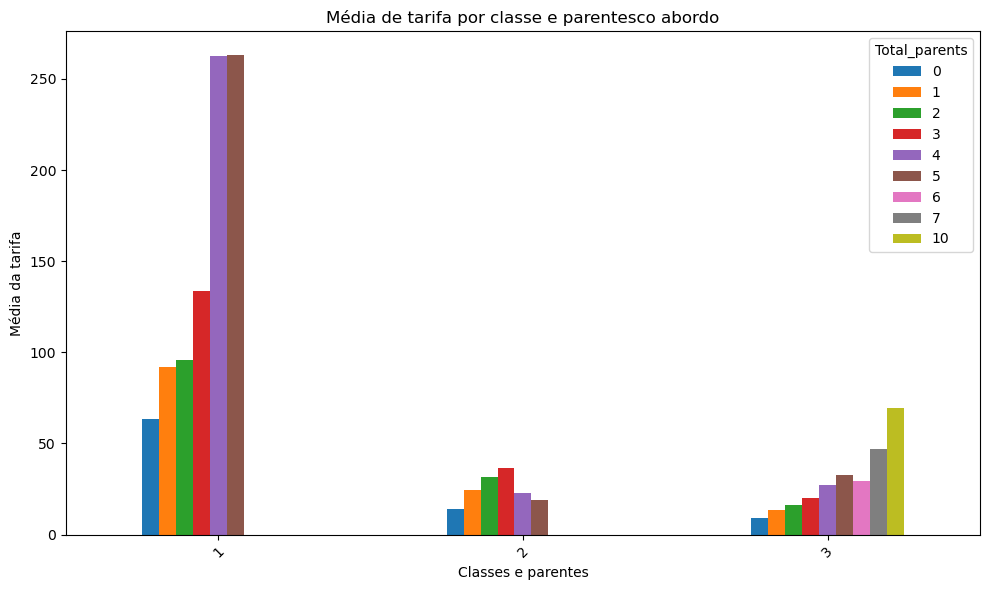

In [37]:
box.plot(kind='bar', figsize=(10, 6))
plt.title("Média de tarifa por classe e parentesco abordo")
plt.xlabel("Classes e parentes")
plt.ylabel("Média da tarifa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Os protagonistas do filme Titanic, existiram mesmo ou eram ficticios?**

In [38]:
titanic[titanic["Name"].str.contains("Jack")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Total_parents
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,41,0,0,112379,39.6,NaN,C,Adult,0


In [39]:
titanic[titanic["Name"].str.contains("Rose")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Total_parents
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18,0,1,392091,9.35,NaN,S,Adult,1


Com essa análise, percebe que [Jack Dawson](https://pt.wikipedia.org/wiki/Jack_Dawson), interpretado por Leonardo DiCaprio, e [Rose DeWitt Bukater](t.wikipedia.org/wiki/Rose_DeWitt_Bukater), interpretada por Kate Winslet, são fictícios, mas segundo o site [Aventuras na História](https://aventurasnahistoria.com.br/noticias/desventuras/titanic-o-que-aconteceu-com-mulher-da-vida-real-que-inspirou-rose.phtml), a Rose foi uma inspiração de Beatrice Wood, onde foi uma pessoa que naufrágiou no titanic.


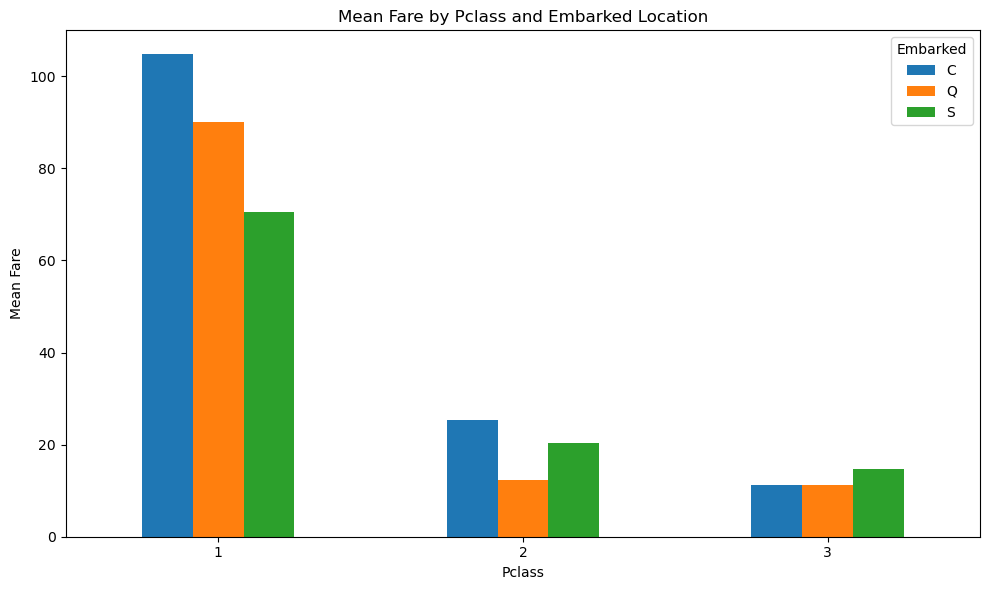

In [40]:
# Group by Pclass and Embarked and calculate the mean fare
mean_fare_by_class_embarked = titanic.groupby(["Pclass", "Embarked"])["Fare"].mean().unstack()

# Plot the grouped data
mean_fare_by_class_embarked.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Fare by Pclass and Embarked Location")
plt.xlabel("Pclass")
plt.ylabel("Mean Fare")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
#Salvar o dataset modificado e tratado
titanic.to_csv("/home/elias/Documentos/VSCode/Ciência_de_ Dados/Projetos/Titanic/ML/titanic_clean", index=False)